In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("mEhfU44diUU_user_comments.csv")
df.head()

,comment,replies,date,user_name,likes
0,Pixel you Beauty 🕺,"['1 saal mein fusss😂😂', '\u200b@@mysteryconque...",2025-08-27T17:46:54Z,@GlorytoMe7,91
1,14:43 google photos on steroids 😂😂,['😂 Exactly! Pixel 10 + Gemini AI = Google Pho...,2025-08-27T17:24:36Z,@valricknunes8848,171
2,"That clear 100x is definately AI , why they ne...","['I phone 17 series surprise kregi', '\u200b@@...",2025-08-27T17:51:51Z,@benjiganjewala,81
3,2:15 Honesty say Google ka design Apple se pri...,[],2025-08-28T06:56:26Z,@shardulgalgate8076,38
4,Kon kon meri trahe 5 saal puarana phone use ka...,"['@RohitKumar-i3x7r 6 saal bro', '\u200b@@roy....",2025-08-27T17:07:31Z,@RohitKumar-i3x7r,1041


In [7]:
df = df[["comment", "likes"]]
df.head()

,comment,likes
0,Pixel you Beauty 🕺,91
1,14:43 google photos on steroids 😂😂,171
2,"That clear 100x is definately AI , why they ne...",81
3,2:15 Honesty say Google ka design Apple se pri...,38
4,Kon kon meri trahe 5 saal puarana phone use ka...,1041


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F

# (Twitter RoBERTa sentiment is great for YouTube-like comments)
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def sentiment_polarity(text: str):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    probs = F.softmax(outputs.logits, dim=-1).detach().numpy()[0]

    return {
        "neg": float(probs[0]),
        "neu": float(probs[1]),
        "pos": float(probs[2])
    }

print(sentiment_polarity("This video is absolutely amazing!! 🔥🔥"))
print(sentiment_polarity("I hated every second of this."))


d:\NLP Project\Youtube_comment_based_aspect_analysis\myvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'neg': 0.005352035630494356, 'neu': 0.010265839286148548, 'pos': 0.9843820929527283}
{'neg': 0.9313576817512512, 'neu': 0.05712766572833061, 'pos': 0.011514625512063503}


In [9]:
scores = df['comment'].apply(sentiment_polarity)
scores_df = pd.DataFrame(scores.tolist())
df = pd.concat([df, scores_df], axis=1)
df.head()

,comment,likes,neg,neu,pos
0,Pixel you Beauty 🕺,91,0.008298,0.081035,0.910667
1,14:43 google photos on steroids 😂😂,171,0.233848,0.580522,0.185630
2,"That clear 100x is definately AI , why they ne...",81,0.012132,0.063991,0.923877
3,2:15 Honesty say Google ka design Apple se pri...,38,0.008824,0.148553,0.842623
4,Kon kon meri trahe 5 saal puarana phone use ka...,1041,0.503985,0.468015,0.028000


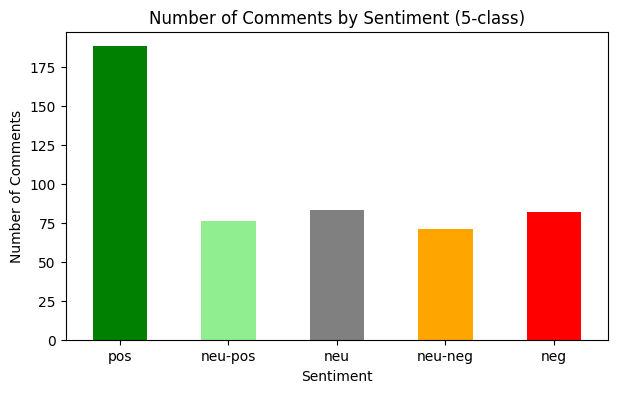

In [ ]:
import matplotlib.pyplot as plt

def classify_sentiment(row):
    diff = row["pos"] - row["neg"]
    if diff > 0.2:
        return "pos"
    elif 0.05 < diff <= 0.2:
        return "neu-pos"
    elif -0.05 <= diff <= 0.05:
        return "neu"
    elif -0.2 <= diff < -0.05:
        return "neu-neg"
    else:
        return "neg"

df["sentiment"] = df.apply(classify_sentiment, axis=1)

sentiment_counts = df["sentiment"].value_counts().reindex(
    ["pos","neu-pos","neu","neu-neg","neg"], fill_value=0
)

plt.figure(figsize=(7,4))
sentiment_counts.plot(kind="bar", color=["green","lightgreen","gray","orange","red"])
plt.title("Number of Comments by Sentiment (5-class)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.show()

In [11]:
df.head()

,comment,likes,neg,neu,pos,sentiment
0,Pixel you Beauty 🕺,91,0.008298,0.081035,0.910667,pos
1,14:43 google photos on steroids 😂😂,171,0.233848,0.580522,0.185630,neu
2,"That clear 100x is definately AI , why they ne...",81,0.012132,0.063991,0.923877,pos
3,2:15 Honesty say Google ka design Apple se pri...,38,0.008824,0.148553,0.842623,pos
4,Kon kon meri trahe 5 saal puarana phone use ka...,1041,0.503985,0.468015,0.028000,neg


In [12]:
df_pos = df[(df['sentiment'] == 'pos')]
df_neg = df[(df['sentiment'] == 'neg')]
df_neu = df[(df['sentiment'] == 'neu')]
len(df_pos), len(df_neg), len(df_neu)

(188, 82, 83)

In [13]:
df_pos = df_pos.sort_values("likes", ascending=False)
df_neg = df_neg.sort_values("likes", ascending=False)
df_neu = df_neu.sort_values("likes", ascending=False)
len(df_pos), len(df_neg), len(df_neu)

(188, 82, 83)

In [14]:
df_pos.head()

,comment,likes,neg,neu,pos,sentiment
0,Pixel you Beauty 🕺,91,0.008298,0.081035,0.910667,pos
2,"That clear 100x is definately AI , why they ne...",81,0.012132,0.063991,0.923877,pos
3,2:15 Honesty say Google ka design Apple se pri...,38,0.008824,0.148553,0.842623,pos
30,Mai ₹124999 me pixel ki jagah Samsung Galaxy S...,25,0.009645,0.235162,0.755193,pos
8,Love You Google Pixel ❤🎉,23,0.003268,0.009166,0.987566,pos


In [15]:
df_neg.head()

,comment,likes,neg,neu,pos,sentiment
4,Kon kon meri trahe 5 saal puarana phone use ka...,1041,0.503985,0.468015,0.028000,neg
11,Koi berozgar aya h kya😢,131,0.642408,0.342303,0.015288,neg
50,I always skip the drop test! 🫣,14,0.656310,0.278477,0.065213,neg
24,Mja nhi aya 😂😂😂😂 price dek k kedni m hlka ha...,13,0.460195,0.490721,0.049084,neg
59,Pura mood kharab ho gaya jab phone ka box dirt...,7,0.417284,0.561812,0.020903,neg


In [23]:
from langchain_community.llms import Ollama
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

llm = Ollama(model="llama3.2")

prompt_template = """
You are analyzing YouTube comments based on the aspect: "{aspect}". 

Here are 5 positive comments:
{pos_comments}

Here are 5 negative comments:
{neg_comments}

Here are 5 neutral comments:
{neu_comments}

Summarize the overall sentiment and key themes in 3-4 sentences.
"""

prompt = PromptTemplate(
    input_variables=["aspect", "pos_comments", "neg_comments", "neu_comments"],
    template=prompt_template
)

chain = LLMChain(llm=llm, prompt=prompt)

pos_comments = list(df_pos.head(5)['comment'])
neg_comments = list(df_neg.head(5)['comment'])
neu_comments = list(df_neu.head(5)['comment'])

result = chain.run(
    pos_comments="\n".join(pos_comments),
    neg_comments="\n".join(neg_comments),
    neu_comments="\n".join(neu_comments),
    aspect="pixel 10"
)

print("=== Summary ===")
print(result)


=== Summary ===
The overall sentiment of the comments is mixed, with a slight leaning towards positivity. The positive comments express admiration for the Pixel 10's camera quality, design, and performance, while also appreciating Google's features such as Google Photos. However, some users are dissatisfied with the phone's price, durability, or packaging. Overall, the tone of the comments suggests that while the Pixel 10 has its strengths, it may not be perfect for everyone.

Key themes emerge from the comments, including:

* Camera quality and performance: Many users praise the Pixel 10's camera capabilities, calling them "great" and "definitely AI".
* Design and build quality: Some commenters appreciate the phone's design, with one saying it feels like an "Apple product", while others criticize its durability.
* Price and value: Several users express dissatisfaction with the phone's price, with some joking about having a "heart attack" due to the cost.
* Packaging and overall experi

Note: you may need to restart the kernel to use updated packages.
